In [1]:
# Importing the necessary libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Load the  file
df = pd.read_csv("megamart_sales_cleaned_data.csv")


In [3]:
# Create SQL database

# Create connection
conn = sqlite3.connect('megamart_sales.db')

# Load data to SQL
df.to_sql('sales_data', conn, if_exists='replace', index=False)

300

SALES PERFORMANCE BY CATEGORY
      Category  product_count  avg_sales  total_sales  avg_profit  \
0  Electronics             79    1327.47    104870.26      252.80   
1    Furniture             88    1165.31    102547.52      209.94   
2     Clothing             71    1335.94     94851.93      219.59   
3    Groceries             62    1444.18     89539.42      227.96   

   total_profit  
0      19970.97  
1      18474.30  
2      15590.71  
3      14133.80  


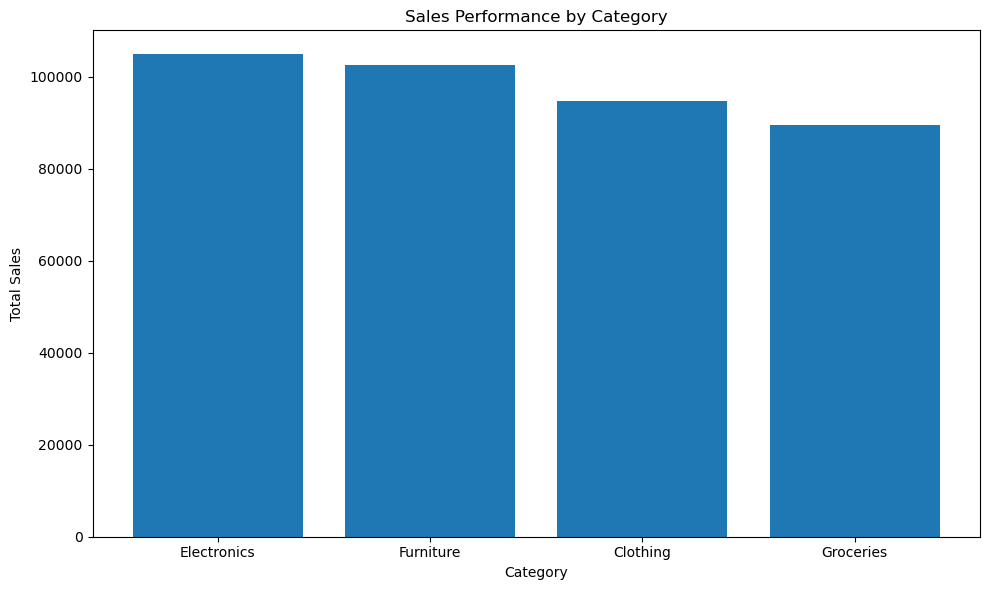

In [5]:
# Sales Performance by Category
print("SALES PERFORMANCE BY CATEGORY")

query1 = """
SELECT 
    "Product Category" as Category,
    COUNT(*) as product_count,
    ROUND(AVG("Total Sales"), 2) as avg_sales,
    SUM("Total Sales") as total_sales,
    ROUND(AVG("Profit Amount"), 2) as avg_profit,
    SUM("Profit Amount") as total_profit
FROM sales_data
GROUP BY "Product Category"
ORDER BY total_sales DESC
"""

result1 = pd.read_sql_query(query1, conn)
print(result1)

plt.figure(figsize=(10, 6))
plt.bar(result1['Category'], result1['total_sales'])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Category')
plt.tight_layout()
plt.show()


TOP 10 PERFORMING PRODUCTS BY SALES
  Product Name  Total Sales
0         Eggs     39487.52
1        Shirt     31781.98
2        Chair     30745.01
3          Bed     30093.90
4   Smartphone     29090.44
5      Sweater     26821.28
6       Laptop     25965.91
7       Tablet     25110.16
8   Headphones     24703.75
9        Table     23872.13


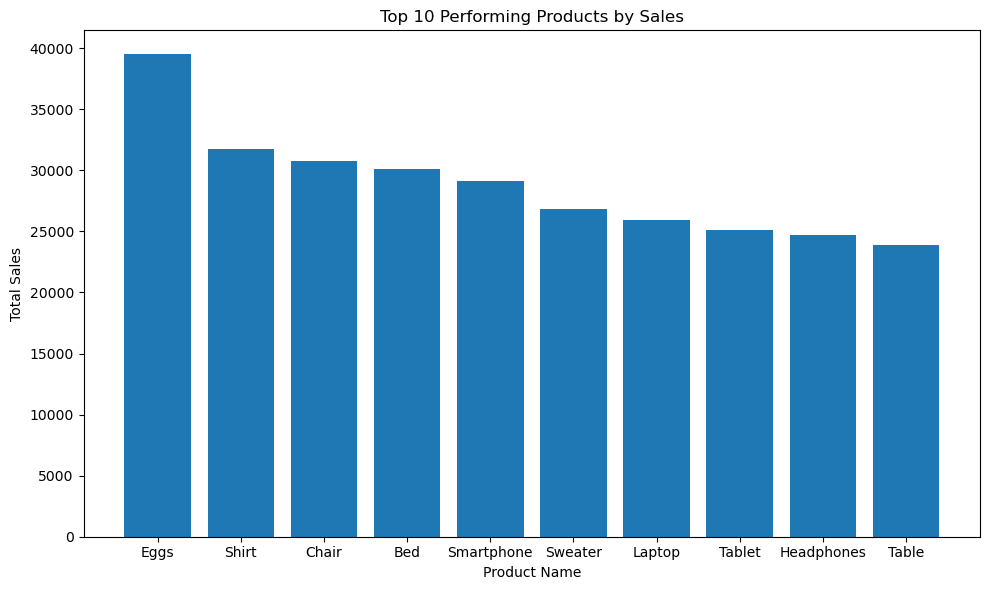

In [15]:
# Top Performing Products
print("TOP 10 PERFORMING PRODUCTS BY SALES")

query2 = """
SELECT 
    "Product Name",
    SUM("Total Sales") as "Total Sales"
FROM sales_data
GROUP BY "Product Name"
ORDER BY "Total Sales" DESC
LIMIT 10
"""

result2 = pd.read_sql_query(query2, conn)
print(result2)

plt.figure(figsize=(10, 6))
plt.bar(result2['Product Name'], result2['Total Sales'])
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Performing Products by Sales')
plt.tight_layout()
plt.show()


SALES BY REGION
  Region  total_sales  total_profit
0   West    103651.94      18014.61
1  South    102874.07      18511.56
2   East     96761.56      16140.54
3  North     88521.56      15503.07


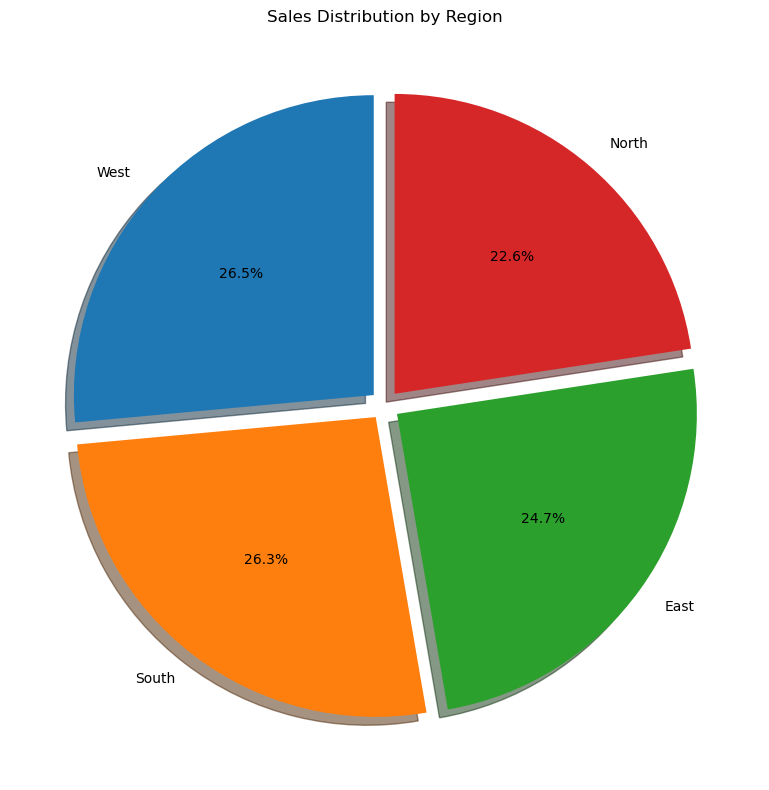

In [7]:
# Sales by Region
print("SALES BY REGION")

query3 = """
SELECT 
    "Region",
    SUM("Total Sales") as total_sales,
    SUM("Profit Amount") as total_profit
FROM sales_data
GROUP BY "Region"
ORDER BY "total_sales" DESC
"""

result3 = pd.read_sql_query(query3, conn)
print(result3)

plt.figure(figsize=(10, 8))
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(result3['total_sales'], 
         labels=result3['Region'], 
         autopct='%1.1f%%', 
         startangle=90,
         explode=explode,
         shadow=True
         )
plt.title('Sales Distribution by Region')
plt.tight_layout()
plt.show()

SALES BY ORDER DATE (MONTHLY)


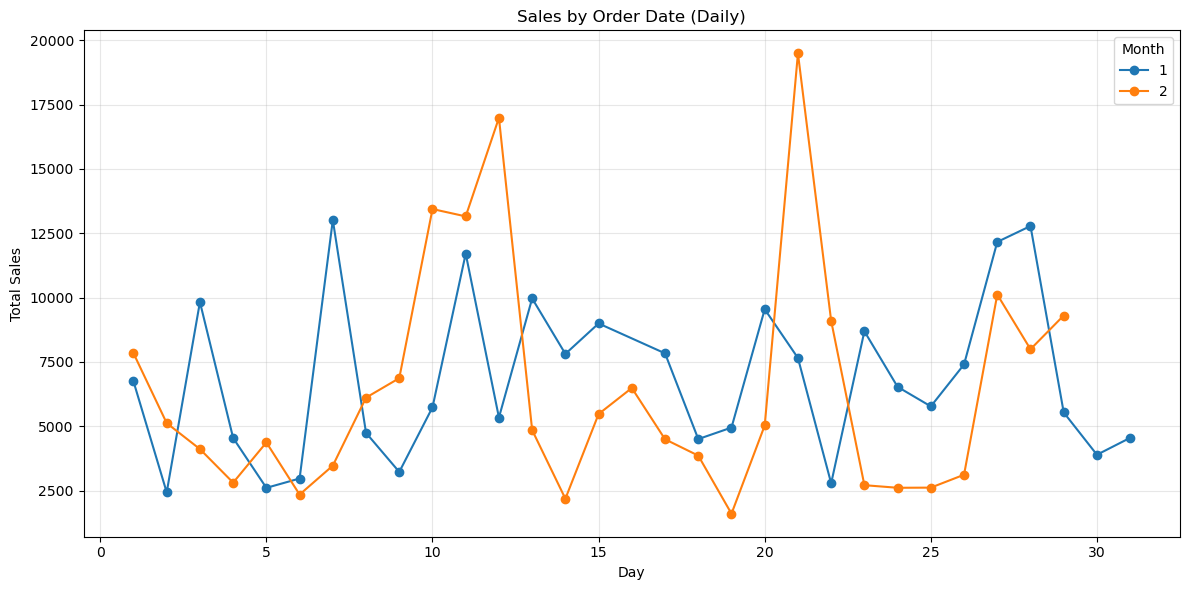

In [8]:
# Sales by Order Date (monthly)
print("SALES BY ORDER DATE (MONTHLY)")

query4 = """
SELECT 
    "Order Date",
    SUM("Total Sales") as total_sales
FROM sales_data
GROUP BY "Order Date"
ORDER BY "Order Date" ASC
"""

result4 = pd.read_sql_query(query4, conn)

# Convert Order Date to datetime and extract month for legend
result4['Order Date'] = pd.to_datetime(result4['Order Date'])
result4['Day'] = result4['Order Date'].dt.day
result4['Month'] = result4['Order Date'].dt.month

# Create line chart
plt.figure(figsize=(12, 6))
for month in result4['Month'].unique():
    month_data = result4[result4['Month'] == month]
    plt.plot(month_data['Day'], month_data['total_sales'], marker='o', label=str(month))

plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Sales by Order Date (Daily)')
plt.legend(title='Month')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ORDER SIZE DISTRIBUTION
   Quantity Sold  count
0              1     33
1              2     26
2              3     26
3              4     43
4              5     31
5              6     15
6              7     31
7              8     33
8              9     32
9             10     30


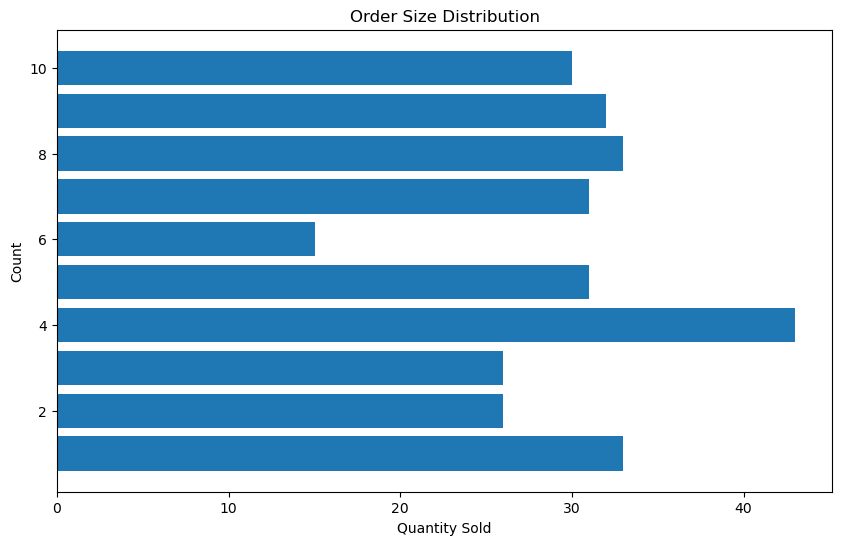

In [106]:
# Order size distribution
print("ORDER SIZE DISTRIBUTION")

query5 = """
SELECT 
    "Quantity Sold",
    COUNT(*) as count
FROM sales_data
GROUP BY "Quantity Sold"
ORDER BY "Quantity Sold" ASC
"""
result5 = pd.read_sql_query(query5, conn)
print(result5)

plt.figure(figsize=(10, 6))
plt.barh(result5['Quantity Sold'], result5['count'])
plt.xlabel('Quantity Sold')
plt.ylabel('Count')
plt.title('Order Size Distribution')
plt.show()



SALES VS PROFIT AMOUNT CORRELATION
Correlation coefficient between Total Sales and Profit Amount: 0.8219


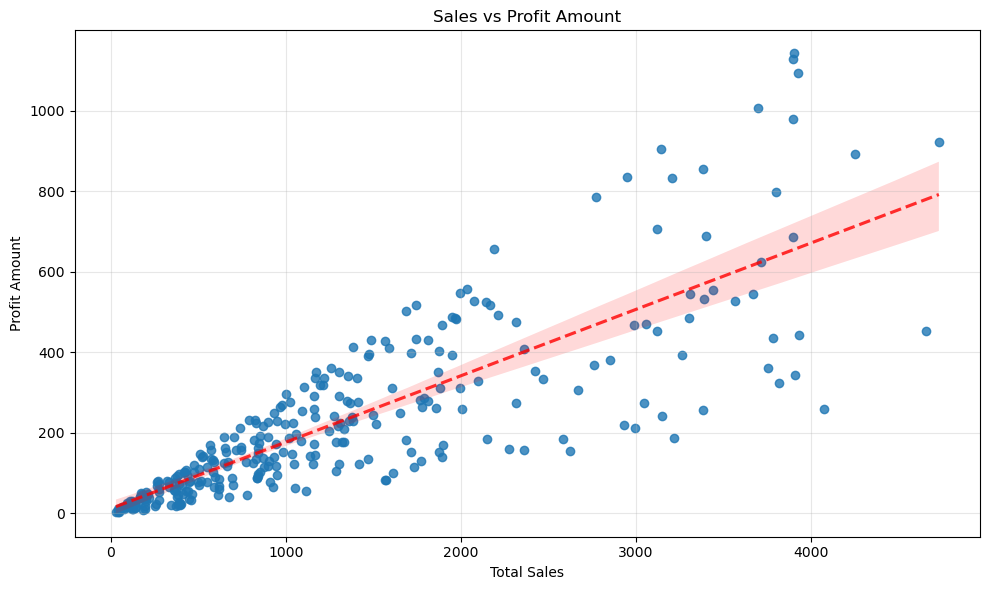

In [9]:
# Sales vs profit amount correlation
print("SALES VS PROFIT AMOUNT CORRELATION")

query6 = """
SELECT 
    "Total Sales",
    "Profit Amount"
FROM sales_data
"""
result6 = pd.read_sql_query(query6, conn)

# Calculate correlation coefficient
correlation = result6['Total Sales'].corr(result6['Profit Amount'])
print(f"Correlation coefficient between Total Sales and Profit Amount: {correlation:.4f}")

# Create scatter plot to visualize correlation
plt.figure(figsize=(10, 6))
sns.regplot(data=result6, x='Total Sales', y='Profit Amount', scatter=True, line_kws={'linestyle': '--', 'alpha': 0.8, 'color': 'red'})
plt.title('Sales vs Profit Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

PROFITABILITY ANALYSIS BY SUBCATEGORY
  Customer Segment  product_count  avg_profit  total_profit  avg_profit_margin
0        Corporate            119      241.97      28794.25              18.20
1           Retail             90      214.30      19287.39              17.56
2        Wholesale             91      220.75      20088.14              17.55


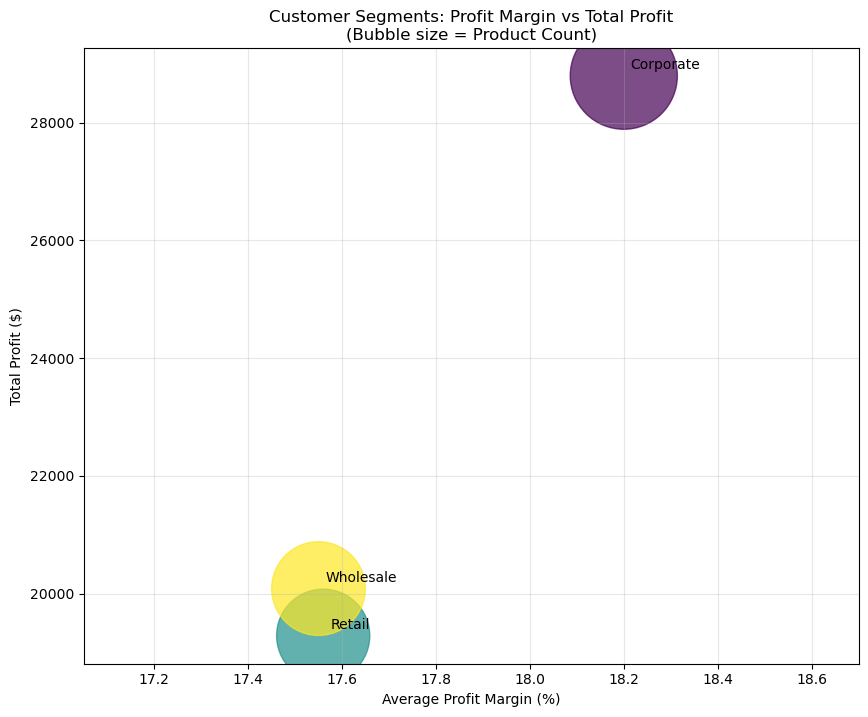

In [17]:
# 4. Profitability Analysis by Customer Segment
print("PROFITABILITY ANALYSIS BY SUBCATEGORY")

query7 = """
SELECT 
    "Customer Segment",
    COUNT(*) as product_count,
    ROUND(AVG("Profit Amount"), 2) as avg_profit,
    ROUND(SUM("Profit Amount"), 2) as total_profit,
    ROUND(AVG("Profit Margin (%)"), 2) as avg_profit_margin
FROM sales_data
GROUP BY "Customer Segment"
HAVING COUNT(*) > 1
ORDER BY avg_profit_margin DESC
"""

result7 = pd.read_sql_query(query7, conn)
print(result7)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(result7['avg_profit_margin'], 
                      result7['total_profit'],
                      s=result7['product_count']*50,
                      alpha=0.7, c=range(len(result7)))
plt.xlim(result7['avg_profit_margin'].min() - .5, result7['avg_profit_margin'].max() + .5)

# Add labels using Customer Segment
for i, segment in enumerate(result7['Customer Segment']):
    plt.annotate(segment, 
                 (result7['avg_profit_margin'].iloc[i], 
                  result7['total_profit'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Total Profit ($)')
plt.title('Customer Segments: Profit Margin vs Total Profit\n(Bubble size = Product Count)')
plt.grid(True, alpha=0.3)
plt.show()





SALES DISTRIBUTION ANALYSIS
         sales_range  product_count  avg_profit  avg_profit_margin
0         Low (<100)             11       11.72              18.37
1   Medium (100-500)             71       49.81              17.22
2    High (500-1000)             71      140.71              18.75
3  Very High (>1000)            147      370.84              17.60


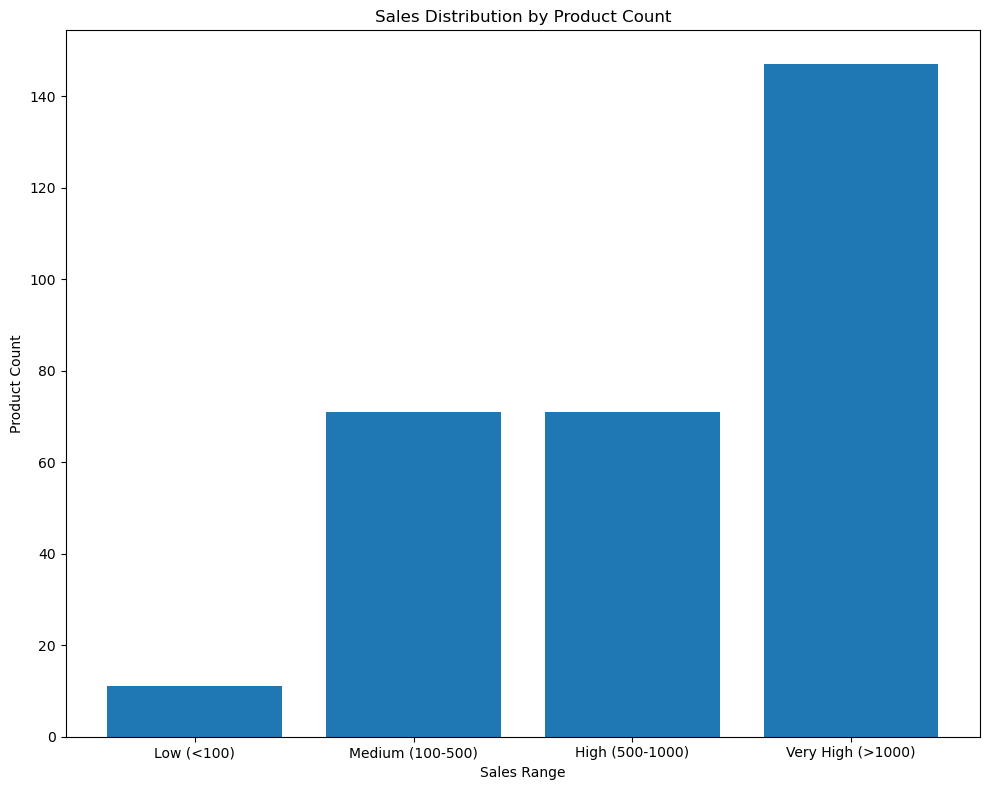

In [24]:
# Sales Distribution Analysis
print("SALES DISTRIBUTION ANALYSIS")

query8 = """
SELECT 
    CASE 
        WHEN "Total Sales" < 100 THEN 'Low (<100)'
        WHEN "Total Sales" < 500 THEN 'Medium (100-500)'
        WHEN "Total Sales" < 1000 THEN 'High (500-1000)'
        ELSE 'Very High (>1000)'
    END as sales_range,
    COUNT(*) as product_count,
    ROUND(AVG("Profit Amount"), 2) as avg_profit,
    ROUND(AVG("Profit Margin (%)"), 2) as avg_profit_margin
FROM sales_data
GROUP BY sales_range
ORDER BY 
    CASE sales_range
        WHEN 'Low (<100)' THEN 1
        WHEN 'Medium (100-500)' THEN 2
        WHEN 'High (500-1000)' THEN 3
        WHEN 'Very High (>1000)' THEN 4
    END
"""

result8 = pd.read_sql_query(query8, conn)
print(result8)

plt.figure(figsize=(10, 8))
bars = plt.bar(result8['sales_range'], result8['product_count'])
plt.title('Sales Distribution by Product Count')
plt.xlabel('Sales Range')
plt.ylabel('Product Count')
plt.tight_layout()
plt.show()

TOTAL SALES BY PAYMENT METHOD AND ORDER STATUS
   payment_method order_status  product_count  total_sales
0   Bank Transfer     Canceled             32     45426.96
1   Bank Transfer    Completed             24     35773.81
2   Bank Transfer      Pending             18     19981.66
3            Cash     Canceled             20     22000.62
4            Cash    Completed             29     44598.10
5            Cash      Pending             20     28559.89
6     Credit Card     Canceled             28     26477.13
7     Credit Card    Completed             15     19014.08
8     Credit Card      Pending             24     33852.51
9          PayPal     Canceled             27     44209.72
10         PayPal    Completed             31     45141.46
11         PayPal      Pending             32     26773.19


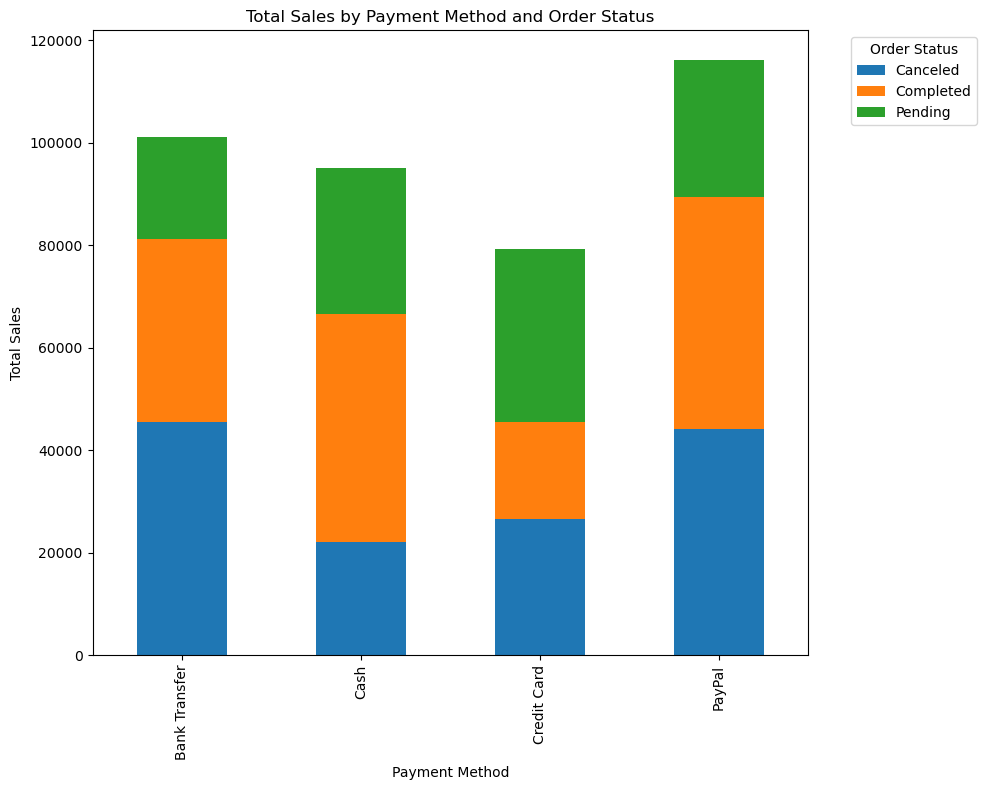

In [33]:
#Total Sales by Payment Method and Order Status
print("TOTAL SALES BY PAYMENT METHOD AND ORDER STATUS")

query9 = """
SELECT 
    "Payment Method" as payment_method,
    "Order Status" as order_status,
    COUNT(*) as product_count,
    ROUND(SUM("Total Sales"), 2) as total_sales
FROM sales_data
GROUP BY "Payment Method", "Order Status"
ORDER BY payment_method, order_status
"""
result9 = pd.read_sql_query(query9, conn)
print(result9)

# Create pivot table for stacked bar chart
pivot_data = result9.pivot(index='payment_method', columns='order_status', values='total_sales')
pivot_data = pivot_data.fillna(0)

plt.figure(figsize=(10, 8))
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Total Sales by Payment Method and Order Status')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [34]:
# close connection
conn.close()
